<a href="https://colab.research.google.com/github/meenubenny/bike_sharind_demand_prediction/blob/main/MeenuBenny_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Seoul Bike Sharing Demand Prediction**

---



---




###**Steps**


---





1.   Importing necessary libraries
2.   Loading the data





##1.   Importing necessary libraries



In [ ]:
import os 
import datetime
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

##2. Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/SUPERVISED 1/SeoulBikeData.csv',sep=',',encoding='latin')

In [ ]:
# Importing the dataset
dataset = ('/content/drive/MyDrive/Alma Better/capstone project/SUPERVISED 1/SeoulBikeData.csv')

In [ ]:
# dataframe

df = pd.read_csv(dataset, encoding = "ISO-8859-1")

# Exploratory data analysis 

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
value = len(df[df.duplicated()])
value

0

In [ ]:
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
'Temperature(°C)':'Temperature',
'Humidity(%)':'Humidity',
'Wind speed (m/s)':'Wind_speed',
'Visibility (10m)':'Visibility',
'Dew point temperature(°C)':'Dew_point_temperature',
'Solar Radiation (MJ/m2)':'Solar_Radiation',
'Rainfall(mm)':'Rainfall',
'Snowfall (cm)':'Snowfall',
'Functioning Day':'Functioning_Day'})

In [ ]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df['weekend_day'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
df = df.drop(columns= ['Date','day','year'],axis=1)

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend_day            8760 non-null   int64  
dtypes: f

In [ ]:
df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df['weekend_day'].value_counts()

0    6264
1    2496
Name: weekend_day, dtype: int64

In [ ]:
columns = ['Hour','month','weekend_day']
for col in columns:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend_day            8760 non-null   c

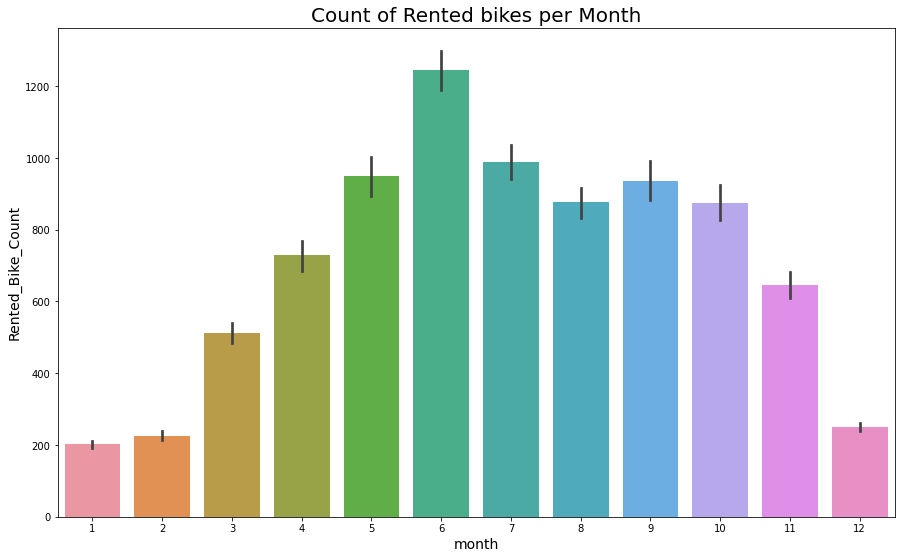

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Month',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='month', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes per Month', fontsize = 20);
plt.show()

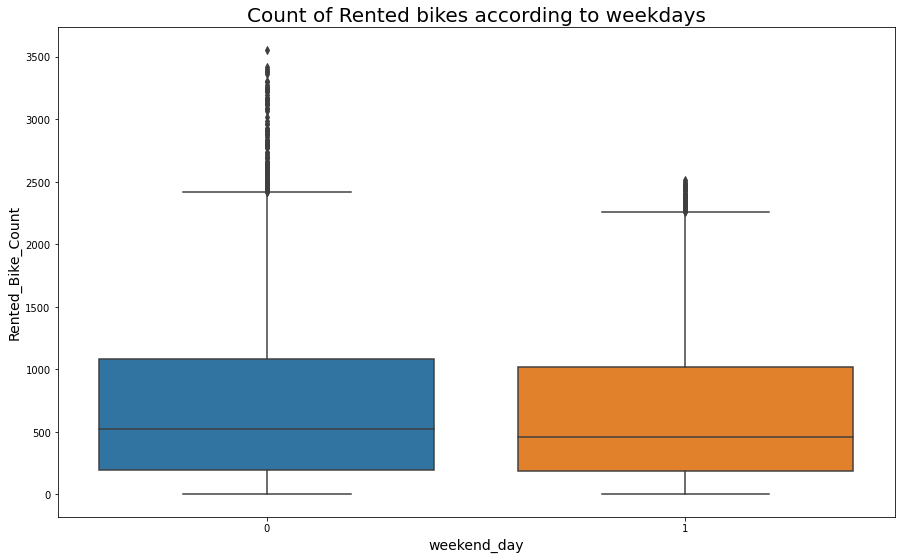

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('weekend days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.boxplot(x='weekend_day', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

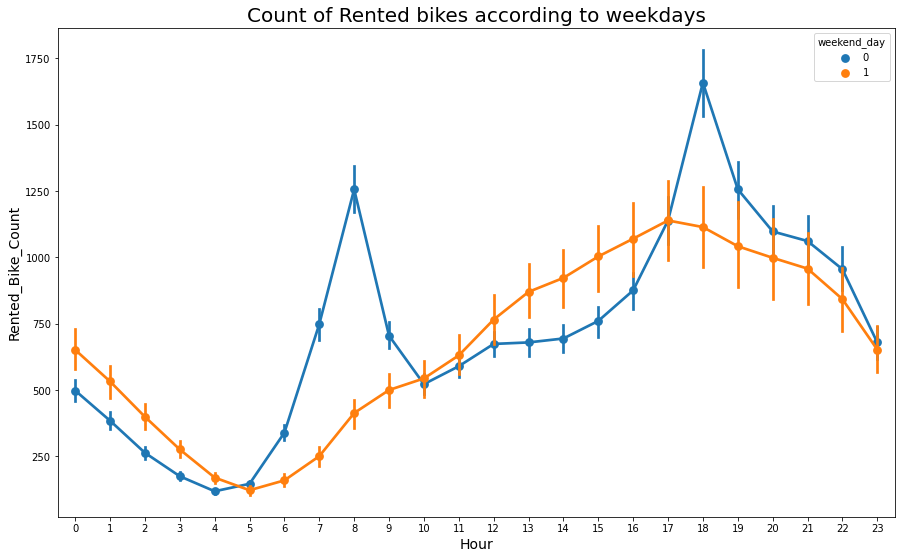

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='weekend_day')
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

In [ ]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

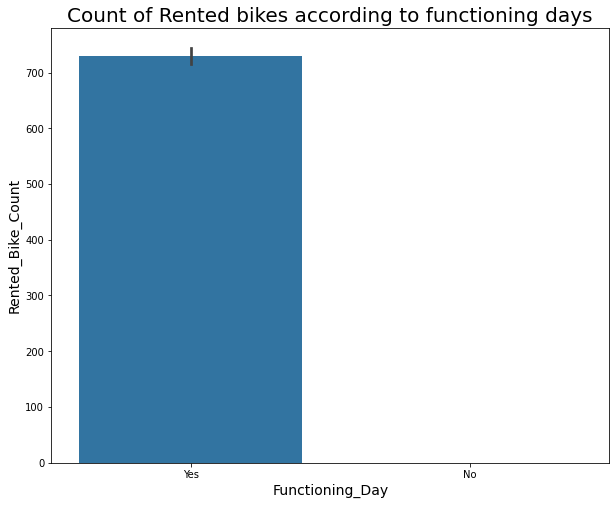

In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Functioning_Day', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

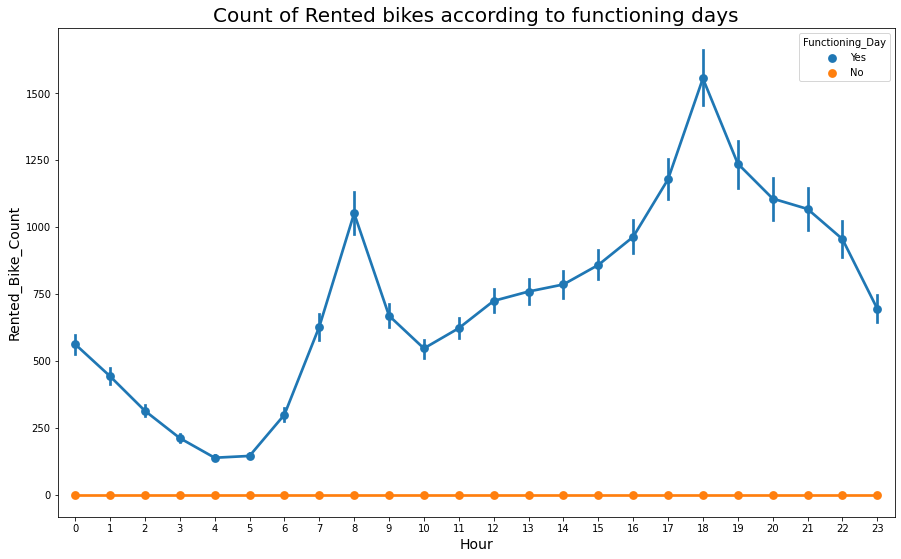

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Functioning Days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Functioning_Day')
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

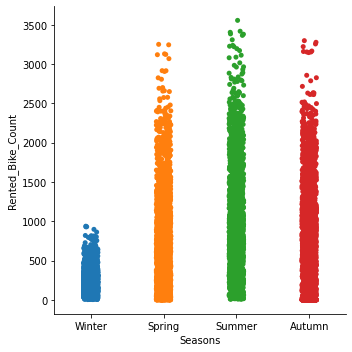

In [ ]:
graph=sns.catplot(x='Seasons',y='Rented_Bike_Count', data=df)
plt.show()

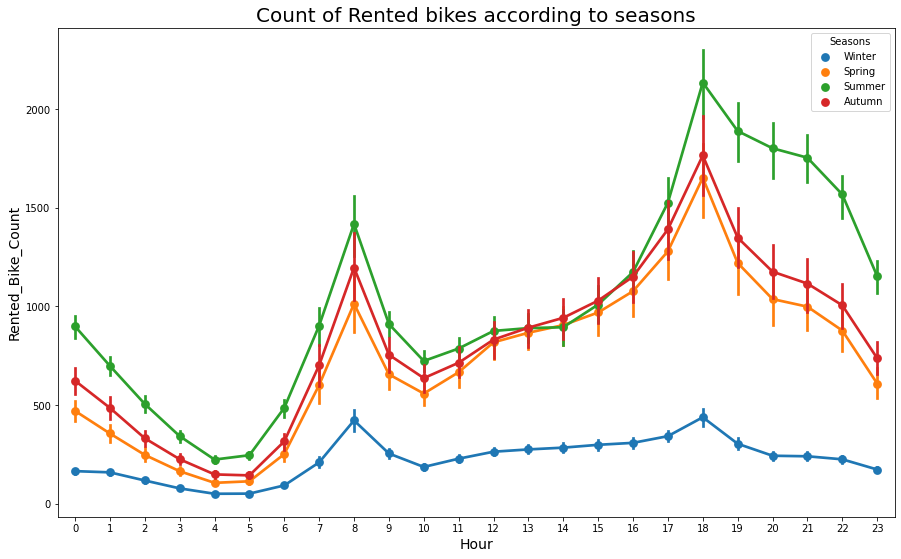

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Seasons')
graph.set_title('Count of Rented bikes according to seasons', fontsize = 20);
plt.show()

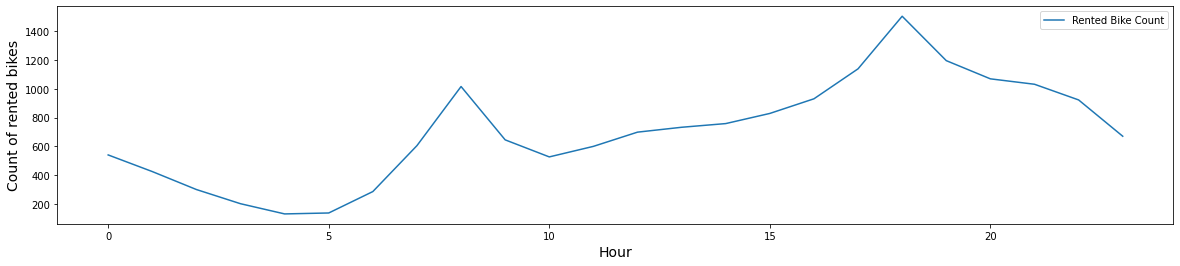

In [ ]:
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()
plt.figure(figsize=(20,4))
plt.ylabel('Count of rented bikes',fontsize=14)
plt.xlabel('Hour',fontsize=14)
sns.lineplot( x = 'Hour', y = avg_rent_hrs, data = df, label = 'Rented Bike Count')
graph.set_title('Average Bikes Rented Per Hour', fontsize = 20);


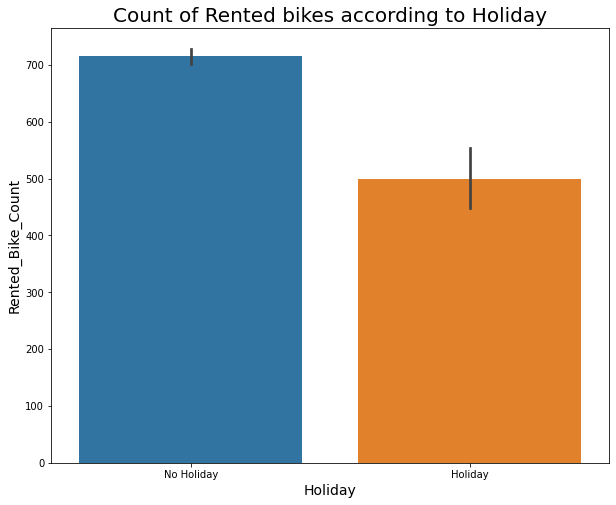

In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Holiday',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Holiday', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to Holiday', fontsize = 20);
plt.show()

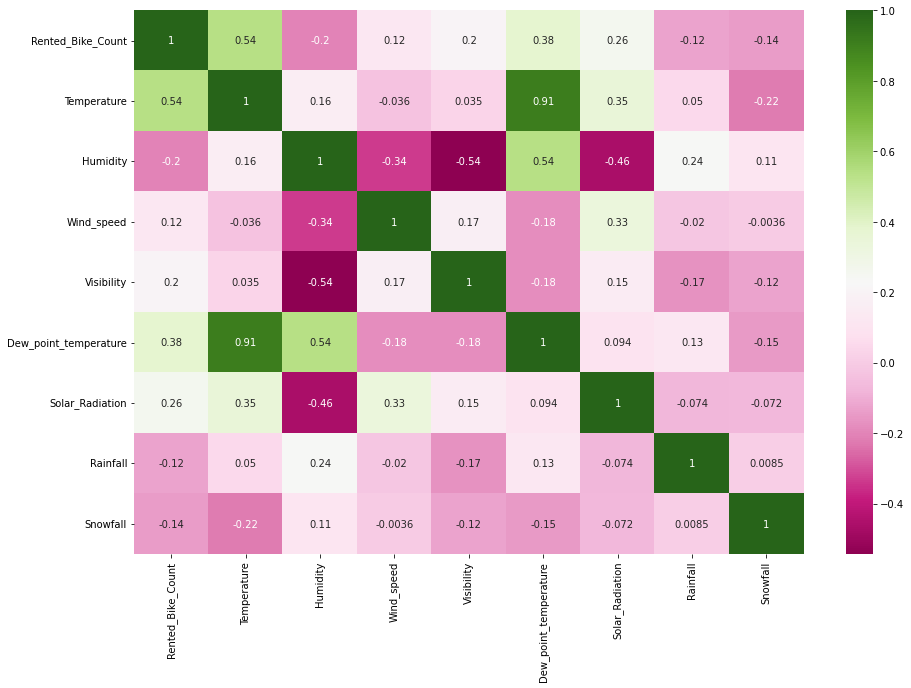

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.show()

In [ ]:
numeric_features= df.select_dtypes(exclude='object')
numeric_features

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekend_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


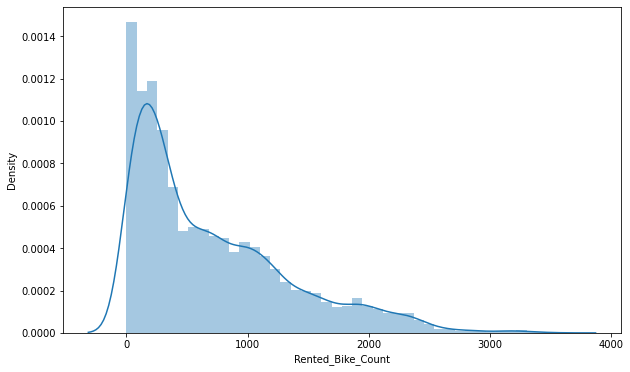

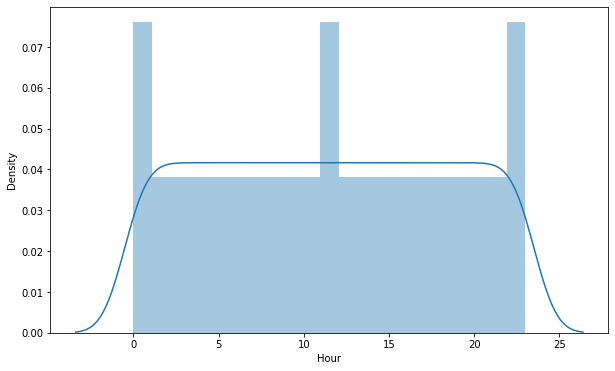

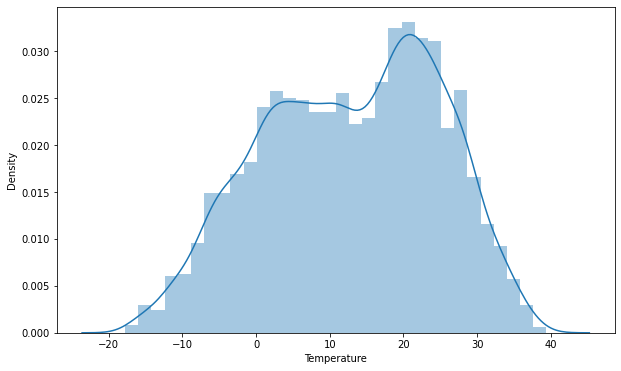

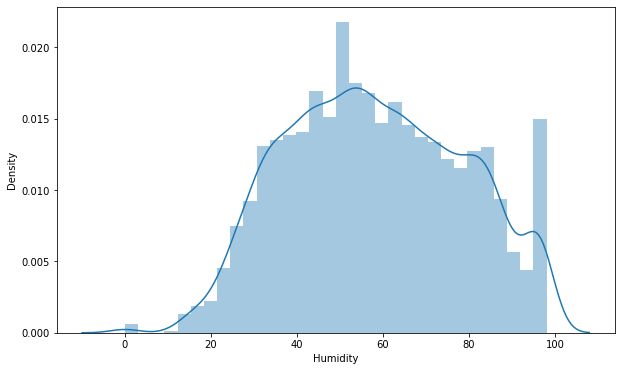

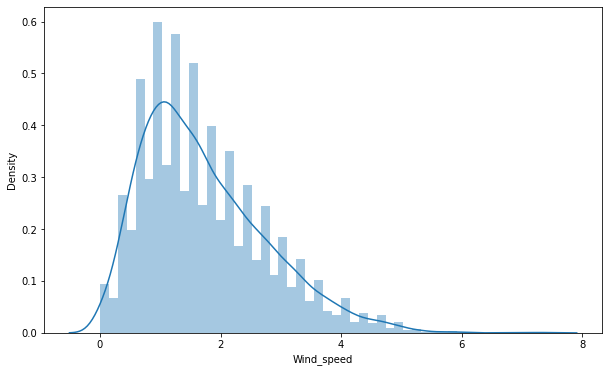

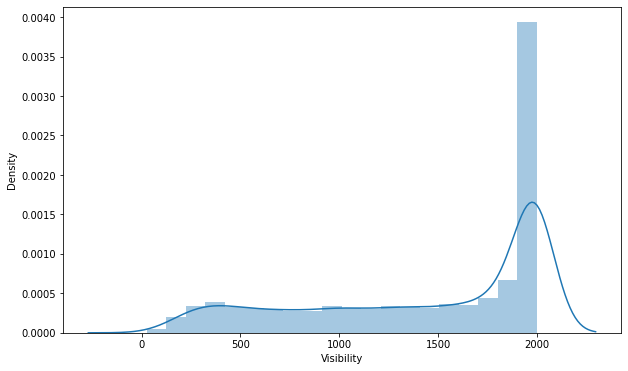

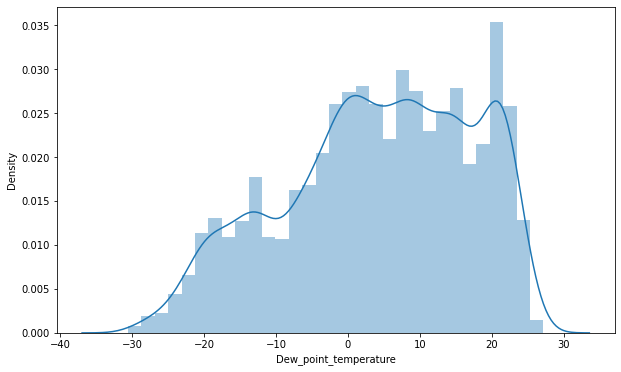

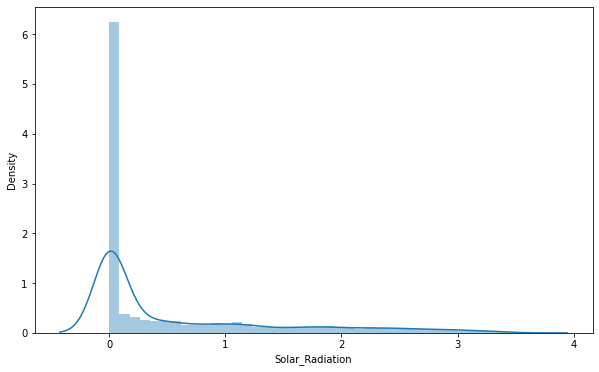

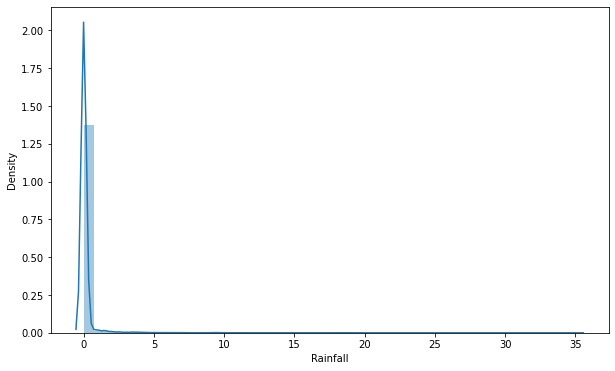

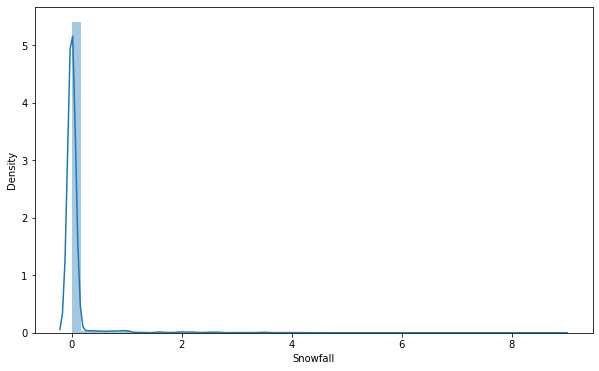

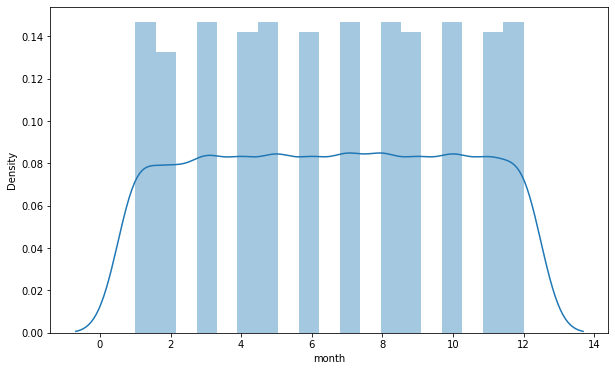

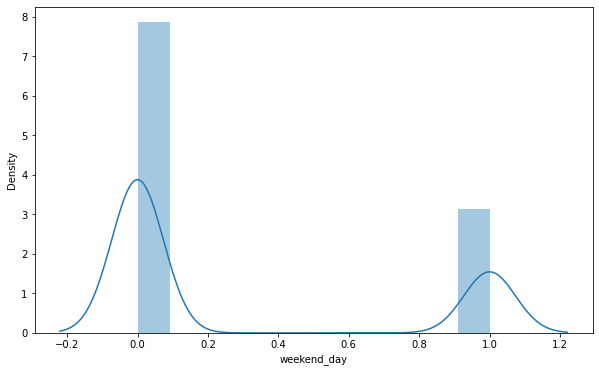

In [ ]:
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

In [ ]:
categorical_features= df.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning_Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


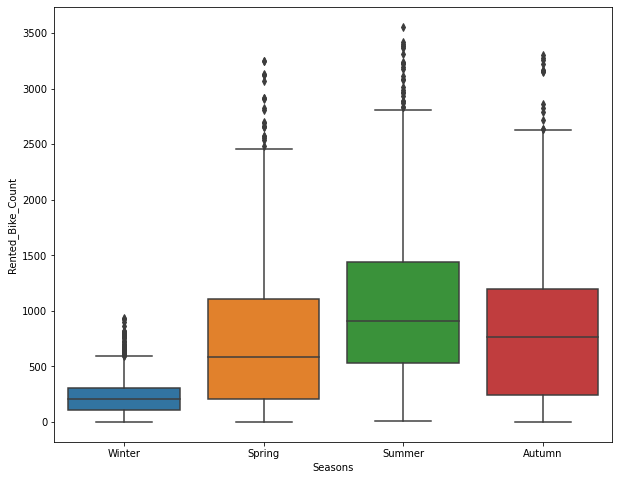

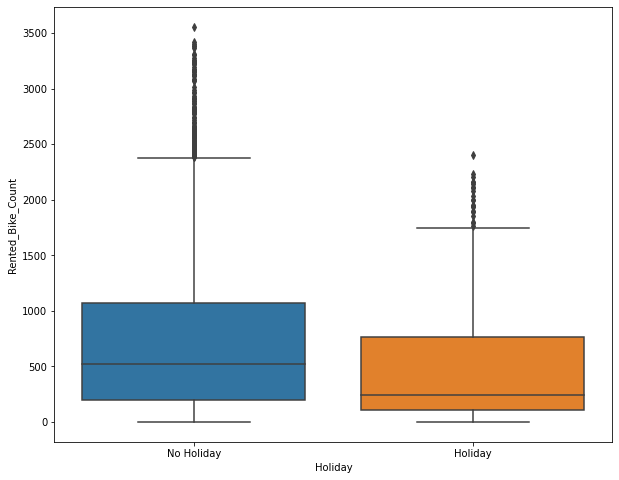

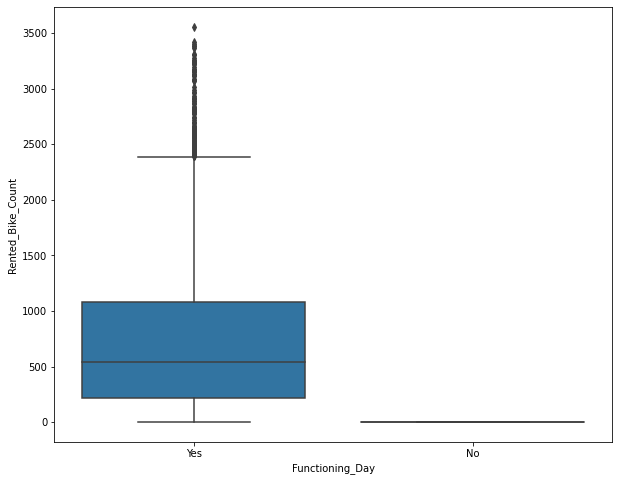

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented_Bike_Count"])
  plt.show()

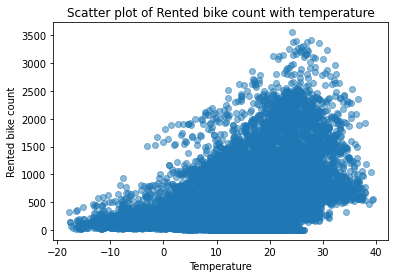

In [ ]:

plt.scatter(df['Temperature'], df['Rented_Bike_Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike count with temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.show()

In [ ]:
plt.scatter(df['Temperature'], df['Rented_Bike_Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike count with temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.show()

In [ ]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [ ]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekend_day
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0


In [ ]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.0,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.0,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.0,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.0,1.00,1.00,1.00
Functioning_Day_Yes,8760.0,0.966324,0.180404,0.0,1.0,1.00,1.00,1.00
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00


In [ ]:
# Train - Spliting  data
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [ ]:
X.shape

(8760, 16)

In [ ]:
y=np.sqrt(final_df['Rented_Bike_Count'])

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
#linear regression model

linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model.intercept_

23.3893626063294

In [ ]:
linear_model.coef_

array([-0.85051296, -1.10069639, -3.24757806,  0.65867518,  5.06977478,
        3.4174006 , -0.02384431, -6.03707488,  0.06824145, -0.08421911,
        6.61184746, -0.55345407, -1.63344099,  0.07911686,  0.59067077,
       -0.62219699])

In [ ]:
y_pred_train = linear_model.predict(X_train)

In [ ]:
y_train

458     10.392305
6000    29.206164
6897    34.655447
1960    19.824228
5308    11.532563
          ...    
2895    39.268308
7813    32.619013
905     18.681542
5192    42.848571
235     13.453624
Name: Rented_Bike_Count, Length: 6570, dtype: float64

In [ ]:
# Predicting the Test set results
y_pred = linear_model.predict(X_test)

In [ ]:
y_pred

array([22.78143044, 29.90624176, 26.9372853 , ...,  9.03197511,
       27.75298813,  7.35596794])

In [ ]:
y_test

4136    26.343880
6705    34.438351
3538    28.089144
6583    22.605309
1993    13.784049
          ...    
1909    18.357560
285     16.431677
314     10.344080
3875    31.176915
968     19.672316
Name: Rented_Bike_Count, Length: 2190, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)

51.96919754285766

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.307295334235893

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

7.208966468423727

In [ ]:
r2_score(y_train, y_pred_train)

0.656848445414216

In [ ]:
r2_score(y_test, y_pred)

0.660738066202897